# Knapsack problem

### Knapsack problem statement

The **knapsack problem** is the following problem in combinatorial optimization:

*Given a set of items, each with a weight and a value, determine which items to include in the collection so that the total weight is less than or equal to a given limit and the total value is as large as possible.*

It derives its name from the problem faced by someone who is constrained by a fixed-size knapsack and must fill it with the most valuable items. The problem often arises in resource allocation where the decision-makers have to choose from a set of non-divisible projects or tasks under a fixed budget or time constraint, respectively.

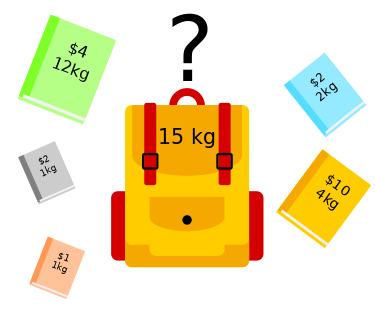

### Definition

The most common problem being solved is the **0-1** knapsack problem, which restricts the number x_{i} of copies of each kind of item to zero or one. Given a set of n items numbered from 1 up to n, each with a weight w_{i} and a value v_{i}, along with a maximum weight capacity W,

$$ \textrm{maximize}  \sum \limits _{i=1} ^{n}v{i}x{i} $$ <br>
$$ \textrm{subject to} \sum \limits _{i=1} ^{n}w{i}x{i} <= W {\textrm{ and }} x{i} \in {0, 1}$$

### Solution

Given several items with weights and values represent a solution as a gene with 0 and 1 chromosomes, where 1 means include the item in the knapsack and 0 means not include the item. 

In [5]:
# Import libraries
from random import uniform
from numpy.random import randint

In [6]:
# Define global variables
TOURNAMENT_SIZE = 20
CHROMOSOME_LENGTH = 4
WEIGHT_CAPACITY = 8

In [11]:
class Individual:

    def __init__(self, weights, values):
        self.weights = weights
        self.values = values
        self.genes = [randint(0, 2) for _ in range(CHROMOSOME_LENGTH)]

    # calculates the fitness values of these chromosomes (individuals)
    def get_fitness(self):

        # if the self.genes value is 1 - take the item
        # the higher the value the higher the fitness value
        weight = 0
        value = 0

        for index, gene in enumerate(self.genes):
            if gene == 1:
                weight += self.weights[index]
                value += self.values[index]

        if weight <= WEIGHT_CAPACITY:
            return value

        # the items can not fit into the knapsack (penalize)
        return -float('inf')

    def __repr__(self):
        return ''.join(str(gene) for gene in self.genes)

In [12]:
class Population:

    def __init__(self, population_size, weights, values):
        self.population_size = population_size
        self.individuals = [Individual(weights, values) for _ in range(population_size)]

    # linear search (maximum finding) in O(N) time complexity
    def get_fittest(self):

        fittest = self.individuals[0]

        for individual in self.individuals[1:]:
            if individual.get_fitness() > fittest.get_fitness():
                fittest = individual

        return fittest

    # return with N individuals that have the highest fitness values
    def get_fittest_elitism(self, n):
        self.individuals.sort(key=lambda ind: ind.get_fitness(), reverse=True)
        return self.individuals[:n]

    def get_size(self):
        return self.population_size

    def get_individual(self, index):
        return self.individuals[index]

    def save_individual(self, index, individual):
        self.individuals[index] = individual

In [13]:
class GeneticAlgorithm:

    def __init__(self, weights, values, population_size=100, crossover_rate=0.85, mutation_rate=0.15, elitism_param=5):
        self.population_size = population_size
        self.weights = weights
        self.values = values
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.elitism_param = elitism_param

    def run(self):
        pop = Population(self.population_size, self.weights, self.values)
        generation_counter = 0

        while generation_counter < 100:
            generation_counter += 1
            print('Generation #%s - fittest is: %s with fitness value %s' % (
                generation_counter, pop.get_fittest(), pop.get_fittest().get_fitness()))
            pop = self.evolve_population(pop)

        print('Solution found...')
        print(pop.get_fittest())

    def evolve_population(self, population):
        next_population = Population(self.population_size, self.weights, self.values)

        # elitism: the top fittest individuals from previous population survive
        # so we copy the top N=5 individuals to the next iteration (next population)
        # in this case the population fitness can not decrease during the iterations
        next_population.individuals.extend(population.get_fittest_elitism(self.elitism_param))

        # crossover
        for index in range(self.elitism_param, next_population.get_size()):
            first = self.random_selection(population)
            second = self.random_selection(population)
            next_population.save_individual(index, self.crossover(first, second))

        # mutation
        for individual in next_population.individuals:
            self.mutate(individual)

        return next_population

    def crossover(self, individual1, individual2):
        cross_individual = Individual(self.weights, self.values)
        start = randint(CHROMOSOME_LENGTH)
        end = randint(CHROMOSOME_LENGTH)

        if end < start:
            start, end = end, start

        cross_individual.genes = individual1.genes[:start] + individual2.genes[start:end] + individual1.genes[end:]

        return cross_individual

    def mutate(self, individual):
        for index in range(CHROMOSOME_LENGTH):
            if uniform(0, 1) < self.mutation_rate:
                individual.genes[index] = randint(0, 2)

    # tournament selection
    def random_selection(self, actual_population):

        new_population = Population(TOURNAMENT_SIZE, self.weights, self.values)

        # select TOURNAMENT_SIZE individuals at random from the actual population
        for i in range(new_population.get_size()):
            random_index = randint(actual_population.get_size())
            new_population.save_individual(i, actual_population.get_individual(random_index))

        return new_population.get_fittest()

In [14]:
w = [4, 3, 2, 1]
v = [5, 4, 3, 2]

algorithm = GeneticAlgorithm(w, v, 100)
algorithm.run()

Generation #1 - fittest is: 1101 with fitness value 11
Generation #2 - fittest is: 1101 with fitness value 11
Generation #3 - fittest is: 1101 with fitness value 11
Generation #4 - fittest is: 1101 with fitness value 11
Generation #5 - fittest is: 1101 with fitness value 11
Generation #6 - fittest is: 1101 with fitness value 11
Generation #7 - fittest is: 1101 with fitness value 11
Generation #8 - fittest is: 1101 with fitness value 11
Generation #9 - fittest is: 1101 with fitness value 11
Generation #10 - fittest is: 1101 with fitness value 11
Generation #11 - fittest is: 1101 with fitness value 11
Generation #12 - fittest is: 1101 with fitness value 11
Generation #13 - fittest is: 1101 with fitness value 11
Generation #14 - fittest is: 1101 with fitness value 11
Generation #15 - fittest is: 1101 with fitness value 11
Generation #16 - fittest is: 1101 with fitness value 11
Generation #17 - fittest is: 1101 with fitness value 11
Generation #18 - fittest is: 1101 with fitness value 11
G